In [1]:
from keras.datasets import reuters
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(
num_words=10000)

Using TensorFlow backend.


In [2]:
len(train_data)

8982

In [3]:
len(test_data)

2246

In [4]:
train_data[10]

[1,
 245,
 273,
 207,
 156,
 53,
 74,
 160,
 26,
 14,
 46,
 296,
 26,
 39,
 74,
 2979,
 3554,
 14,
 46,
 4689,
 4329,
 86,
 61,
 3499,
 4795,
 14,
 61,
 451,
 4329,
 17,
 12]

In [5]:
word_index = reuters.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
decoded_newswire = ' '.join([reverse_word_index.get(i - 3, '?') for i in
train_data[0]])

In [6]:
decoded_newswire

'? ? ? said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3'

In [7]:
train_labels[10]

3

In [8]:
import numpy as np

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [9]:
from keras.utils.np_utils import to_categorical
one_hot_train_labels = to_categorical(train_labels)
one_hot_test_labels = to_categorical(test_labels)

In [10]:
from keras import models
from keras import layers
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

In [11]:
model.compile(optimizer='rmsprop',
loss='categorical_crossentropy',
metrics=['accuracy'])

In [12]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]
y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

In [13]:
history = model.fit(partial_x_train,
partial_y_train,
epochs=20,
batch_size=512,
validation_data=(x_val, y_val))

Train on 7982 samples, validate on 1000 samples
Epoch 1/20
7982/7982 [==============================] - 1s 102us/step - loss: 2.4614 - accuracy: 0.5187 - val_loss: 1.6340 - val_accuracy: 0.6480
Epoch 2/20
7982/7982 [==============================] - 1s 72us/step - loss: 1.3615 - accuracy: 0.7066 - val_loss: 1.2850 - val_accuracy: 0.7210
Epoch 3/20
7982/7982 [==============================] - 1s 72us/step - loss: 1.0262 - accuracy: 0.7806 - val_loss: 1.1210 - val_accuracy: 0.7500
Epoch 4/20
7982/7982 [==============================] - 1s 72us/step - loss: 0.8095 - accuracy: 0.8262 - val_loss: 1.0208 - val_accuracy: 0.7750
Epoch 5/20
7982/7982 [==============================] - 1s 72us/step - loss: 0.6424 - accuracy: 0.8592 - val_loss: 0.9680 - val_accuracy: 0.7990
Epoch 6/20
7982/7982 [==============================] - 1s 76us/step - loss: 0.5183 - accuracy: 0.8898 - val_loss: 0.9358 - val_accuracy: 0.7970
Epoch 7/20
7982/7982 [==============================] - 1s 72us/step - loss: 0.41

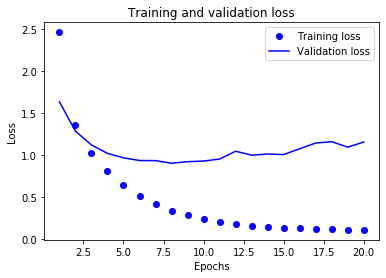

In [14]:
import matplotlib.pyplot as plt
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

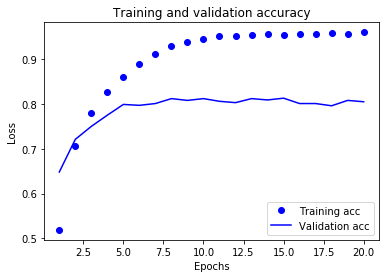

In [15]:
plt.clf()
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [16]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))
model.compile(optimizer='rmsprop',
loss='categorical_crossentropy',
metrics=['accuracy'])
model.fit(partial_x_train,
partial_y_train,
epochs=9,
batch_size=512,
validation_data=(x_val, y_val))
results = model.evaluate(x_test, one_hot_test_labels)

Train on 7982 samples, validate on 1000 samples
Epoch 1/9
7982/7982 [==============================] - 1s 81us/step - loss: 2.6495 - accuracy: 0.5368 - val_loss: 1.7505 - val_accuracy: 0.6430
Epoch 2/9
7982/7982 [==============================] - 1s 73us/step - loss: 1.4386 - accuracy: 0.7018 - val_loss: 1.3322 - val_accuracy: 0.7080
Epoch 3/9
7982/7982 [==============================] - 1s 73us/step - loss: 1.0725 - accuracy: 0.7720 - val_loss: 1.1360 - val_accuracy: 0.7550
Epoch 4/9
7982/7982 [==============================] - 1s 73us/step - loss: 0.8448 - accuracy: 0.8227 - val_loss: 1.0268 - val_accuracy: 0.7940
Epoch 5/9
7982/7982 [==============================] - 1s 72us/step - loss: 0.6779 - accuracy: 0.8569 - val_loss: 0.9616 - val_accuracy: 0.8070
Epoch 6/9
7982/7982 [==============================] - 1s 72us/step - loss: 0.5435 - accuracy: 0.8872 - val_loss: 0.9146 - val_accuracy: 0.8150
Epoch 7/9
7982/7982 [==============================] - 1s 72us/step - loss: 0.4385 - acc

In [17]:
results

[0.9746449481984493, 0.790739119052887]

In [18]:
predictions = model.predict(x_test)

In [19]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(4, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))
model.compile(optimizer='rmsprop',
loss='categorical_crossentropy',
metrics=['accuracy'])
model.fit(partial_x_train,
partial_y_train,
epochs=9,
batch_size=512,
validation_data=(x_val, y_val))
results = model.evaluate(x_test, one_hot_test_labels)
results

Train on 7982 samples, validate on 1000 samples
Epoch 1/9
7982/7982 [==============================] - 1s 79us/step - loss: 3.5476 - accuracy: 0.2071 - val_loss: 3.3160 - val_accuracy: 0.2510
Epoch 2/9
7982/7982 [==============================] - 1s 72us/step - loss: 3.0726 - accuracy: 0.2779 - val_loss: 2.9434 - val_accuracy: 0.2730
Epoch 3/9
7982/7982 [==============================] - 1s 72us/step - loss: 2.6846 - accuracy: 0.2888 - val_loss: 2.6191 - val_accuracy: 0.2810
Epoch 4/9
7982/7982 [==============================] - 1s 72us/step - loss: 2.3508 - accuracy: 0.2972 - val_loss: 2.3444 - val_accuracy: 0.2840
Epoch 5/9
7982/7982 [==============================] - 1s 72us/step - loss: 2.0283 - accuracy: 0.4211 - val_loss: 2.0473 - val_accuracy: 0.5760
Epoch 6/9
7982/7982 [==============================] - 1s 73us/step - loss: 1.7045 - accuracy: 0.6254 - val_loss: 1.7950 - val_accuracy: 0.6110
Epoch 7/9
7982/7982 [==============================] - 1s 71us/step - loss: 1.4564 - acc

[1.547367584248897, 0.6509349942207336]

In [22]:
a = model.predict(x_test)
a[0]

array([2.8734334e-04, 2.7071894e-05, 1.3407684e-03, 6.0025442e-01,
       3.1867459e-01, 1.6417210e-03, 8.3440922e-05, 1.0827534e-05,
       8.0987636e-05, 4.9490038e-05, 5.0464750e-04, 1.2830109e-02,
       6.5415748e-05, 8.0088194e-04, 1.0697752e-06, 8.0116306e-06,
       4.2554908e-03, 8.8964567e-05, 1.3364364e-03, 7.8649977e-03,
       1.5851378e-04, 1.3372265e-06, 6.5463461e-04, 1.9026417e-03,
       1.9906852e-03, 1.3065159e-02, 1.0928400e-05, 1.1797057e-04,
       2.5597408e-06, 5.8316851e-05, 2.9374032e-06, 9.6026866e-04,
       2.7972794e-04, 2.2076502e-02, 1.9872612e-05, 1.2342092e-07,
       7.5788489e-07, 3.0414638e-04, 7.2206422e-03, 2.0061259e-05,
       9.2988892e-05, 3.5677542e-04, 2.2902497e-04, 2.0356358e-05,
       1.4058202e-04, 1.0570094e-04], dtype=float32)

In [23]:
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
decoded_review = ' '.join([reverse_word_index.get(i - 3, '?') for i in test_data[0]])
decoded_review

'? the great atlantic and pacific tea co said its three year 345 mln dlr capital program will be be substantially increased to ? growth and expansion plans for ? inc and ? inc over the next two years a and p said the acquisition of ? in august 1986 and ? in december helped us achieve better than expected results in the fourth quarter ended february 28 its net income from continuing operations jumped 52 6 pct to 20 7 mln dlrs or 55 cts a share in the latest quarter as sales increased 48 3 pct to 1 58 billion dlrs a and p gave no details on the expanded capital program but it did say it completed the first year of the program during 1986 a and p is 52 4 pct owned by lt ? ? of west germany reuter 3'